In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Private_data.csv")
print(df.head())

   Unnamed: 0 NAME OF THE STUDENT                UNIVERSITY PROGRAM NAME  \
0           0         Camila Wood  Stanford University, USA        B.Com   
1           1  Alexander Thompson  Stanford University, USA        B.Com   
2           2         Liam Taylor   Harvard University, USA        B.Com   
3           3      Evelyn Jenkins  Stanford University, USA        B.Com   
4           4     Michael Jackson   Harvard University, USA          MBA   

           Specialisation SEMESTER   Domain  \
0                 Honours      5th  Finance   
1      Financial Services      5th  Finance   
2    Accounting Analytics      5th       BA   
3                 Honours      5th  Finance   
4  International Business      3rd       IB   

   GENERAL MANAGEMENT SCORE (OUT of 50)  Domain Specific SCORE (OUT 50)  \
0                                    50                              50   
1                                    50                              50   
2                                  

In [5]:
df.describe()

,Unnamed: 0,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,75.000000,37.993377,33.635762,71.629139,76.000000,0.503311
std,43.734045,10.734056,11.866751,21.200823,43.734045,0.289629
min,0.000000,4.000000,1.000000,5.000000,1.000000,0.006623
25%,37.500000,32.500000,27.000000,62.000000,38.500000,0.254967
50%,75.000000,40.000000,36.000000,74.000000,76.000000,0.503311
75%,112.500000,47.000000,43.000000,89.000000,113.500000,0.751656
max,150.000000,50.000000,50.000000,100.000000,151.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            151 non-null    int64  
 1   NAME OF THE STUDENT                   151 non-null    object 
 2   UNIVERSITY                            151 non-null    object 
 3   PROGRAM NAME                          151 non-null    object 
 4   Specialisation                        151 non-null    object 
 5   SEMESTER                              151 non-null    object 
 6   Domain                                151 non-null    object 
 7   GENERAL MANAGEMENT SCORE (OUT of 50)  151 non-null    int64  
 8   Domain Specific SCORE (OUT 50)        151 non-null    int64  
 9   TOTAL SCORE (OUT of 100)              151 non-null    int64  
 10  RANK                                  151 non-null    int64  
 11  PERCENTILE         

In [7]:
df.isnull().sum()

Unnamed: 0                              0
NAME OF THE STUDENT                     0
UNIVERSITY                              0
PROGRAM NAME                            0
Specialisation                          0
SEMESTER                                0
Domain                                  0
GENERAL MANAGEMENT SCORE (OUT of 50)    0
Domain Specific SCORE (OUT 50)          0
TOTAL SCORE (OUT of 100)                0
RANK                                    0
PERCENTILE                              0
dtype: int64

# Domain distribution

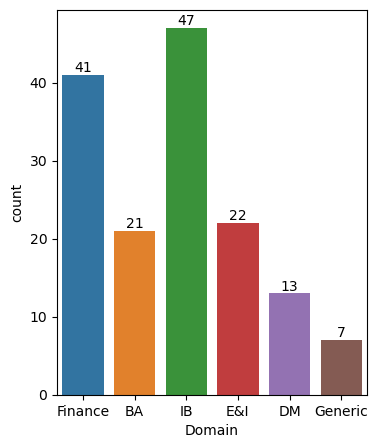

In [8]:
plt.figure(figsize= (4,5))
ax = sns.countplot(data = df, x = "Domain")
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
gp = df.groupby("SEMESTER").agg({"GENERAL MANAGEMENT SCORE (OUT of 50)":'mean',"Domain Specific SCORE (OUT 50)":'mean'})
print(gp)

          GENERAL MANAGEMENT SCORE (OUT of 50)  Domain Specific SCORE (OUT 50)
SEMESTER                                                                      
3rd                                  37.694915                       33.000000
5th                                  38.587500                       34.337500
9th                                  35.500000                       32.083333


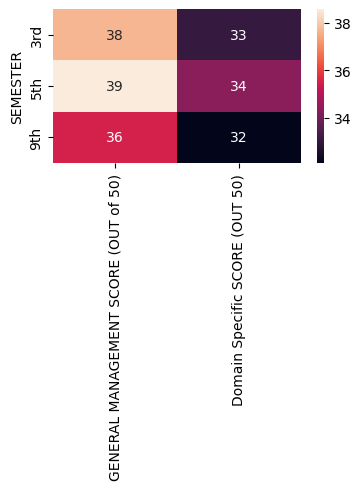

In [10]:
plt.figure(figsize= (4,2))
sns.heatmap(gp, annot = True)
plt.show()

In [112]:
gp1 = df.groupby("PROGRAM NAME").agg({"GENERAL MANAGEMENT SCORE (OUT of 50)":'mean',"Domain Specific SCORE (OUT 50)":'mean'})
print(gp1)

               GENERAL MANAGEMENT SCORE (OUT of 50)  \
PROGRAM NAME                                          
B.Com                                     42.081081   
BBA                                       35.340909   
Intg. BBA+MBA                             35.846154   
MBA                                       37.877193   

               Domain Specific SCORE (OUT 50)  
PROGRAM NAME                                   
B.Com                               37.675676  
BBA                                 31.113636  
Intg. BBA+MBA                       32.615385  
MBA                                 33.192982  


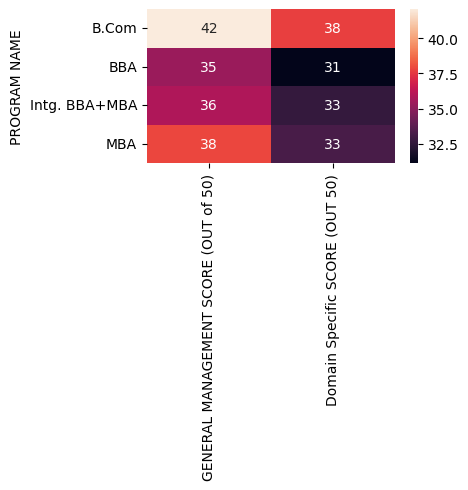

In [113]:
plt.figure(figsize= (4,2))
sns.heatmap(gp1, annot = True)
plt.show()

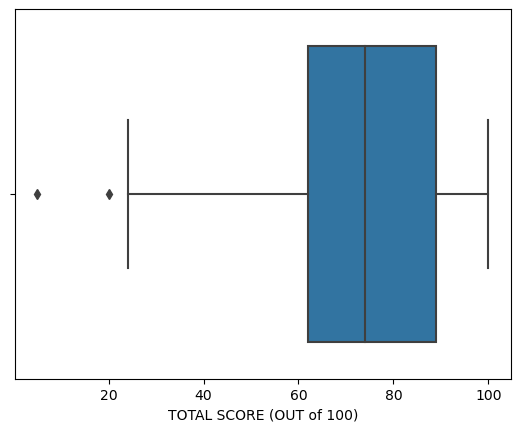

In [115]:
sns.boxplot(data = df, x = "TOTAL SCORE (OUT of 100)")
plt.show()

In [116]:
print(df["PROGRAM NAME"].unique())

['B.Com' 'MBA' 'BBA' 'Intg. BBA+MBA']


# Distribution of Program Names

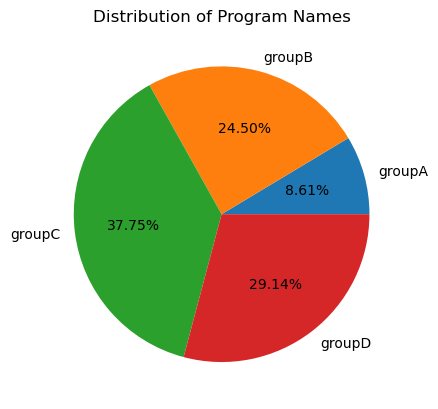

In [125]:
groupA = df.loc[(df['PROGRAM NAME'] == "Intg. BBA+MBA")].count()
groupB = df.loc[(df['PROGRAM NAME'] == "B.Com")].count()
groupC = df.loc[(df['PROGRAM NAME'] == "MBA")].count()
groupD = df.loc[(df['PROGRAM NAME'] == "BBA")].count()

l = ["groupA", "groupB", "groupC", "groupD"]
mlist = [groupA["PROGRAM NAME"], groupB["PROGRAM NAME"], groupC["PROGRAM NAME"], groupD["PROGRAM NAME"]]
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Program Names")
plt.show()
